# COVID 19 MOVEMENT IN INDIA & BEST ALGORITHM FOR RISK ZONE PREDICTION IN WEST BENGAL

## Import all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import pickle

In [2]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 10, 8

## Read Dataset of Covid19 India

In [3]:
#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('Datasets/india-covid-19.csv')

#print TOP 5 RECORD
df.head(15)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,06:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,06:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,06:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,06:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,06:00 PM,Kerala,3,0,0,0,3
5,6,04-02-2020,06:00 PM,Kerala,3,0,0,0,3
6,7,05-02-2020,06:00 PM,Kerala,3,0,0,0,3
7,8,06-02-2020,06:00 PM,Kerala,3,0,0,0,3
8,9,07-02-2020,06:00 PM,Kerala,3,0,0,0,3
9,10,08-02-2020,06:00 PM,Kerala,3,0,0,0,3


## Preprocessing on dataset

In [4]:
# Data type of All Column
# Date column is in Object Format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16526 entries, 0 to 16525
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16526 non-null  int64 
 1   Date                      16526 non-null  object
 2   Time                      16526 non-null  object
 3   State/UnionTerritory      16526 non-null  object
 4   ConfirmedIndianNational   16526 non-null  object
 5   ConfirmedForeignNational  16526 non-null  object
 6   Cured                     16526 non-null  int64 
 7   Deaths                    16526 non-null  int64 
 8   Confirmed                 16526 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [5]:
print ('CHECK NULL VALUE FOR EACH COLUMN')
df.isnull().sum()

CHECK NULL VALUE FOR EACH COLUMN


Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
# CHECK ANY VALUE IS MISSING OR NOT
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
data_changed_colname = df.rename(columns = {"State/UnionTerritory": "SU",
                                            "ConfirmedIndianNational" :"CIN",
                                           "ConfirmedForeignNational":"CFN"}) 

data_changed_colname.head()

,Sno,Date,Time,SU,CIN,CFN,Cured,Deaths,Confirmed
0,1,30-01-2020,06:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,06:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,06:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,06:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,06:00 PM,Kerala,3,0,0,0,3


In [8]:
data = data_changed_colname.copy(deep = True)

In [9]:
data.drop('Sno', axis=1, inplace=True)
data.drop('Time', axis=1, inplace=True)

In [10]:
total = data['SU'].value_counts()
print(total,'\n',total.shape)

Kerala                                      516
Delhi                                       484
Rajasthan                                   483
Haryana                                     482
Uttar Pradesh                               482
Tamil Nadu                                  479
Ladakh                                      479
Jammu and Kashmir                           477
Punjab                                      477
Maharashtra                                 477
Karnataka                                   477
Andhra Pradesh                              474
Uttarakhand                                 471
Odisha                                      470
Puducherry                                  468
West Bengal                                 468
Chandigarh                                  467
Chhattisgarh                                467
Gujarat                                     466
Himachal Pradesh                            465
Madhya Pradesh                          

## A Bar-Plot of per State which is total no of rows of Confirmed Cases

<AxesSubplot:>

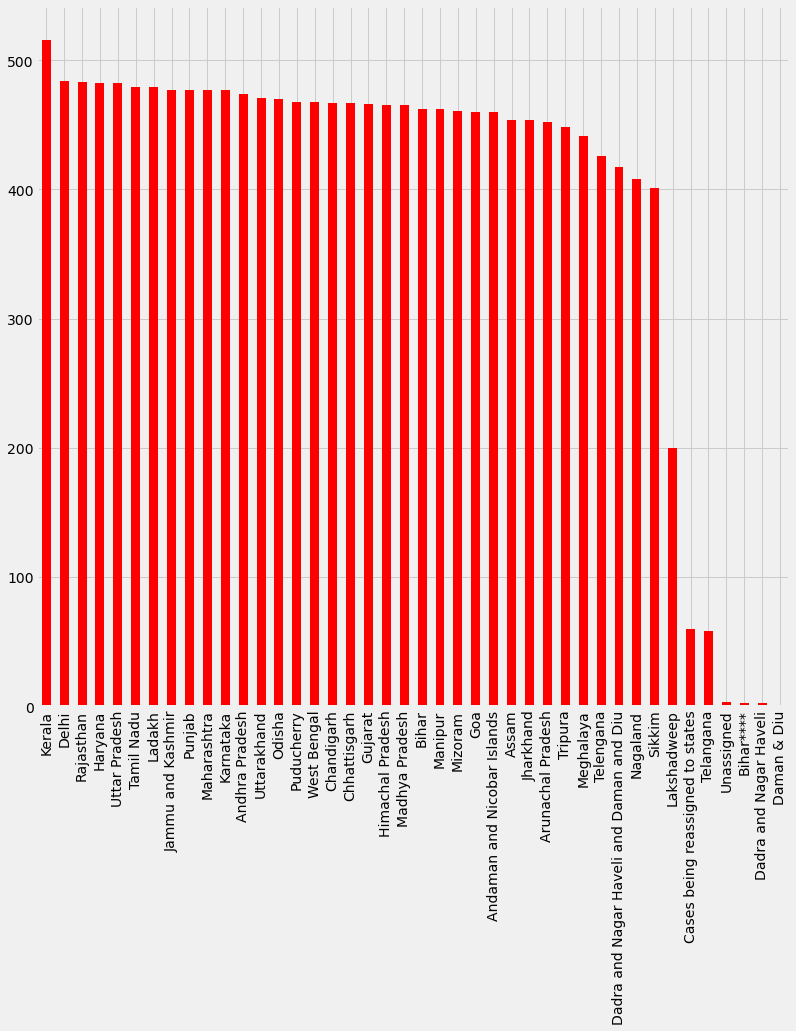

In [11]:
total.plot.bar(color = 'red', figsize = (12, 12))

## A Graphical Plot with coordinates for showing the Movement

In [12]:
# Coordinates of India States and Uts
India_coord = pd.read_csv('Datasets/Indian Coordinates.csv')
# Indian State wise Confirmed Cases
States_confirm = pd.read_csv('Datasets/Indian Covid Confirmed.csv')

In [13]:
# create map and display it

data_full = pd.merge(India_coord,States_confirm,on='Name of State / UT')
map = folium.Map(location=[30, 90], zoom_start=1,tiles='Stamen Toner')

for lat, lon, value, name in zip(data_full['Latitude'], data_full['Longitude'], data_full['Confirmed_Counts'], 
                                 data_full['Name of State / UT']):
    folium.CircleMarker([lat, lon],
                        radius=value*0.01,
                        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Active Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.8 ).add_to(map)
map

## Read WestBengal Covid19 Situation

In [14]:
#Read Data from CSV file And Store It IN DATAFRAME
wb = pd.read_csv('Datasets/WB-State-Covid19.csv')

#print TOP 5 RECORD
wb.head(10)

,District,Date,TAC
0,Alipurduar,30-07-2020,100
1,Coochbehar,30-07-2020,158
2,Darjeeling,30-07-2020,578
3,Kalimpong,30-07-2020,13
4,Jalpaiguri,30-07-2020,350
5,Uttar Dinajpur,30-07-2020,389
6,Dakshin Dinajpur,30-07-2020,297
7,Malda,30-07-2020,366
8,Murshidabad,30-07-2020,230
9,Nadia,30-07-2020,278


In [15]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   District  345 non-null    object
 1   Date      345 non-null    object
 2   TAC       345 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


In [16]:
# wb["TAC"] = wb["TAC"].astype(str).astype(int)
# print(df.dtypes)

## Preprocessing

In [17]:
def zone_function(x):
    if x >= 0 and x < 700:
        return "VeryLow"
    elif x >= 701 and x < 3000:
        return "Low"
    elif x >= 3001 and x < 10000:
        return "Medium"
    elif x >= 10001 and x < 16000:
        return "High"
    elif x >= 16001 and x < 24000:
        return "VeryHigh"
    else:
        return "ExtraHigh"
    

wb["Zone"] = wb["TAC"].apply(zone_function)

wb.head(10)

,District,Date,TAC,Zone
0,Alipurduar,30-07-2020,100,VeryLow
1,Coochbehar,30-07-2020,158,VeryLow
2,Darjeeling,30-07-2020,578,VeryLow
3,Kalimpong,30-07-2020,13,VeryLow
4,Jalpaiguri,30-07-2020,350,VeryLow
5,Uttar Dinajpur,30-07-2020,389,VeryLow
6,Dakshin Dinajpur,30-07-2020,297,VeryLow
7,Malda,30-07-2020,366,VeryLow
8,Murshidabad,30-07-2020,230,VeryLow
9,Nadia,30-07-2020,278,VeryLow


In [18]:
wb["Day"] = pd.to_datetime(wb["Date"], format='%d-%m-%Y').dt.day
wb["Month"] = pd.to_datetime(wb["Date"], format='%d-%m-%Y').dt.month
wb["Year"] = pd.to_datetime(wb["Date"], format='%d-%m-%Y').dt.year
wb.drop(["Date"], axis = 1, inplace = True)
wb.head(23)

,District,TAC,Zone,Day,Month,Year
0,Alipurduar,100,VeryLow,30,7,2020
1,Coochbehar,158,VeryLow,30,7,2020
2,Darjeeling,578,VeryLow,30,7,2020
3,Kalimpong,13,VeryLow,30,7,2020
4,Jalpaiguri,350,VeryLow,30,7,2020
5,Uttar Dinajpur,389,VeryLow,30,7,2020
6,Dakshin Dinajpur,297,VeryLow,30,7,2020
7,Malda,366,VeryLow,30,7,2020
8,Murshidabad,230,VeryLow,30,7,2020
9,Nadia,278,VeryLow,30,7,2020


In [19]:
le = LabelEncoder()
wb['District'] = le.fit_transform(wb['District'])
wb.head(23)

,District,TAC,Zone,Day,Month,Year
0,0,100,VeryLow,30,7,2020
1,3,158,VeryLow,30,7,2020
2,5,578,VeryLow,30,7,2020
3,10,13,VeryLow,30,7,2020
4,8,350,VeryLow,30,7,2020
5,22,389,VeryLow,30,7,2020
6,4,297,VeryLow,30,7,2020
7,12,366,VeryLow,30,7,2020
8,13,230,VeryLow,30,7,2020
9,14,278,VeryLow,30,7,2020


In [20]:
wb['Zone'].value_counts()

VeryLow      187
Low           99
Medium        49
VeryHigh       4
High           3
ExtraHigh      3
Name: Zone, dtype: int64

In [21]:
wb['Zone'] = le.fit_transform(wb['Zone'])
wb['Zone'].value_counts()

5    187
2     99
3     49
4      4
0      3
1      3
Name: Zone, dtype: int64

## Split Input-Data, Output-Data, Train-Test Data

In [22]:
ipd= wb[['Day','Month','Year','District','TAC']]
opd= wb['Zone']

display(opd,"\n\n", ipd)

0      5
1      5
2      5
3      5
4      5
      ..
340    3
341    3
342    4
343    3
344    0
Name: Zone, Length: 345, dtype: int32

'\n\n'

,Day,Month,Year,District,TAC
0,30,7,2020,0,100
1,30,7,2020,3,158
2,30,7,2020,5,578
3,30,7,2020,10,13
4,30,7,2020,8,350
...,...,...,...,...,...
340,30,4,2020,7,6551
341,30,4,2020,6,5559
342,30,4,2020,15,22494
343,30,4,2020,21,7307


In [23]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(ipd,opd,test_size=.2, random_state=1)

print('X TRAIN DATA ', xtrain.shape)
print('X TEST DATA ', xtest.shape)
print('Y TRAIN DATA ', ytrain.shape)
print('Y TEST DATA ', ytest.shape)

X TRAIN DATA  (276, 5)
X TEST DATA  (69, 5)
Y TRAIN DATA  (276,)
Y TEST DATA  (69,)


## DECISION TREE MODEL

In [24]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()

model1.fit(xtrain, ytrain)

ypred1 = model1.predict(xtest)

In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,ypred1))

[[ 0  0  0  2  1]
 [ 0 20  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 36]]


In [26]:
no_of_misclassified_sample = (ytest != ypred1).sum()
print('Misclassified samples: {}'.format(no_of_misclassified_sample))

mis_cla_rate = (no_of_misclassified_sample / len(ytest)) * 100
print('Misclassified Rate WITH PRECISION: {:.2f} %'.format(mis_cla_rate))

Misclassified samples: 3
Misclassified Rate WITH PRECISION: 4.35 %


In [27]:
from sklearn.metrics import classification_report

print('CLASSIFICATION REPORT','\n',classification_report(ytest, ypred1))

CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         9
           4       0.33      1.00      0.50         1
           5       0.97      1.00      0.99        36

    accuracy                           0.96        69
   macro avg       0.66      0.80      0.70        69
weighted avg       0.93      0.96      0.94        69



C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## RANDOM FOREST MODEL

In [28]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=10, random_state=0)

model2.fit(xtrain, ytrain)

ypred2 = model2.predict(xtest)

In [29]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,ypred2))

[[ 0  0  2  0  1]
 [ 0 20  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 36]]


In [30]:
no_of_misclassified_sample = (ytest != ypred2).sum()
print('Misclassified samples: {}'.format(no_of_misclassified_sample))

mis_cla_rate = (no_of_misclassified_sample / len(ytest)) * 100
print('Misclassified Rate WITH PRECISION: {:.2f} %'.format(mis_cla_rate))

Misclassified samples: 3
Misclassified Rate WITH PRECISION: 4.35 %


In [31]:
from sklearn.metrics import classification_report

print('CLASSIFICATION REPORT','\n',classification_report(ytest, ypred2))

CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       1.00      1.00      1.00        20
           3       0.82      1.00      0.90         9
           4       1.00      1.00      1.00         1
           5       0.97      1.00      0.99        36

    accuracy                           0.96        69
   macro avg       0.76      0.80      0.78        69
weighted avg       0.92      0.96      0.94        69



C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## SVM MODEL

In [32]:
from sklearn.svm import SVC

model3 = SVC(kernel='sigmoid', C=10, gamma=10)

model3.fit(xtrain, ytrain)

ypred3 = model3.predict(xtest)

In [33]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,ypred3))

[[ 0  0  0  0  3]
 [ 0  0  0  0 20]
 [ 0  0  0  0  9]
 [ 0  0  0  0  1]
 [ 0  0  0  0 36]]


In [34]:
no_of_misclassified_sample = (ytest != ypred3).sum()
print('Misclassified samples: {}'.format(no_of_misclassified_sample))

mis_cla_rate = (no_of_misclassified_sample / len(ytest)) * 100
print('Misclassified Rate WITH PRECISION: {:.2f} %'.format(mis_cla_rate))

Misclassified samples: 33
Misclassified Rate WITH PRECISION: 47.83 %


In [35]:
from sklearn.metrics import classification_report

print('CLASSIFICATION REPORT','\n',classification_report(ytest, ypred3))

CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1
           5       0.52      1.00      0.69        36

    accuracy                           0.52        69
   macro avg       0.10      0.20      0.14        69
weighted avg       0.27      0.52      0.36        69



C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## MLPCLASSFIER MODEL

In [36]:
from sklearn.neural_network import MLPClassifier

model4 = MLPClassifier(hidden_layer_sizes = (300, 300), max_iter = 200)

model4.fit(xtrain, ytrain)

ypred4 = model4.predict(xtest)

In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,ypred4))

[[ 0  0  0  2  1]
 [ 0 20  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 36]]


In [38]:
no_of_misclassified_sample = (ytest != ypred4).sum()
print('Misclassified samples: {}'.format(no_of_misclassified_sample))

mis_cla_rate = (no_of_misclassified_sample / len(ytest)) * 100
print('Misclassified Rate WITH PRECISION: {:.2f} %'.format(mis_cla_rate))

Misclassified samples: 3
Misclassified Rate WITH PRECISION: 4.35 %


In [39]:
from sklearn.metrics import classification_report

print('CLASSIFICATION REPORT','\n',classification_report(ytest, ypred4))

CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         9
           4       0.33      1.00      0.50         1
           5       0.97      1.00      0.99        36

    accuracy                           0.96        69
   macro avg       0.66      0.80      0.70        69
weighted avg       0.93      0.96      0.94        69



C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Surat\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [40]:
filename = open('Covidzone.pkl', 'wb')
pickle.dump(model4,filename)
filename.close()